# Dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [2]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


### Train and Test data shapes

In [3]:
print(x_train_1.shape)
print(y_train_1.shape)

(60000, 28, 28)
(60000, 10)


In [4]:
print(x_test_1.shape)
print(y_test_1.shape)

(10000, 28, 28)
(10000, 10)


### Showing one of the dataset examples

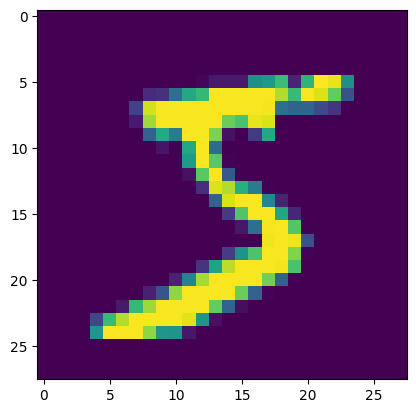

In [5]:
index = 0
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_1[index])

# Model
https://www.tensorflow.org/api_docs/python/tf/keras/models

https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [6]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Sequential
https://www.tensorflow.org/guide/keras/sequential_model

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
model_temp_1 = Sequential()

model_temp_1.add(layers.Input(shape=(50, 50)))

model_temp_1.add(layers.Flatten())


model_temp_1.add(layers.Dense(256, activation='relu'))

model_temp_1.add(layers.Dense(128, activation='relu'))


model_temp_1.add(layers.Dense(5, activation='softmax'))

### Model Summary
https://www.tensorflow.org/js/guide/models_and_layers#model_summary

In [9]:
model_temp_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 256)               640256    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 673797 (2.57 MB)
Trainable params: 673797 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plotting Model and Save it as **structure_1.png**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

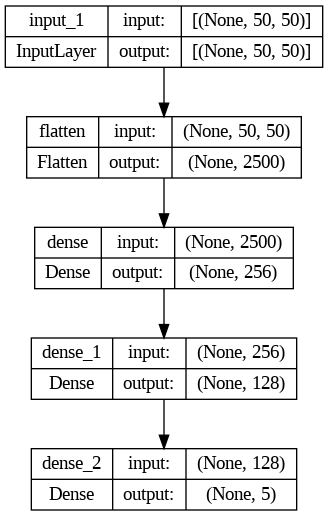

In [10]:
plot_model(
    model_temp_1,
    to_file="structure_1.png",
    show_shapes=True,
    show_layer_names=True,
)

## Functional API
https://www.tensorflow.org/guide/keras/functional

In [11]:
from tensorflow.keras.models import Model

In [12]:
def model_factory(input_shape, num_classes):

  input_layer = layers.Input(shape=input_shape)

  flatten_layer = layers.Flatten()(input_layer)

  hidden_layer1 = layers.Dense(256, activation='relu')(flatten_layer)
  hidden_layer2 = layers.Dense(128, activation='relu')(hidden_layer1)

  output_layer = layers.Dense(num_classes, activation='softmax')(hidden_layer2)

  return Model(inputs=input_layer, outputs=output_layer)

In [13]:
model_template_2 = model_factory(
    input_shape=(50, 50),
    num_classes=5,
)

### Model Summary

In [14]:
model_template_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               640256    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 673797 (2.57 MB)
Trainable params: 673797 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plotting Model and Save it as **structure_2.png**

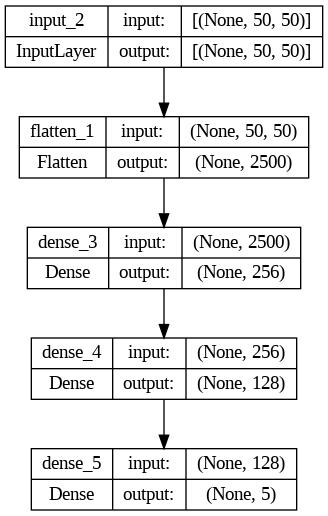

In [15]:
plot_model(
    model_template_2,
    to_file="structure_2.png",
    show_shapes=True,
    show_layer_names=True,
)

## Optimizers and Loss
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [16]:
from tensorflow.keras.optimizers import SGD

In [17]:
sgd_optimizer = SGD(learning_rate=0.001)

## Compile, Fit and Evaluation
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

https://keras.io/api/models/model_training_apis/#predict-method

### MNIST

In [18]:
model_mnist = model_factory(
    input_shape=(28, 28),
    num_classes=10,
)

model_mnist.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model_mnist.fit(x_train_1, y_train_1, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 6ms/step - loss: 2.4281 - accuracy: 0.8145 - val_loss: 0.4937 - val_accuracy: 0.8693
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3975 - accuracy: 0.8947 - val_loss: 0.3603 - val_accuracy: 0.9038
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2916 - accuracy: 0.9179 - val_loss: 0.3120 - val_accuracy: 0.9142
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2378 - accuracy: 0.9305 - val_loss: 0.2907 - val_accuracy: 0.9235
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2037 - accuracy: 0.9382 - val_loss: 0.2619 - val_accuracy: 0.9302
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1786 - accuracy: 0.9463 - val_loss: 0.2556 - val_accuracy: 0.9327
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1597 - accuracy: 0.9513 - val_loss: 0.2475 - val_accuracy: 0.9349
Epoch 

#### Plotting model Loss and Accuracy on train and validation sets per epoch

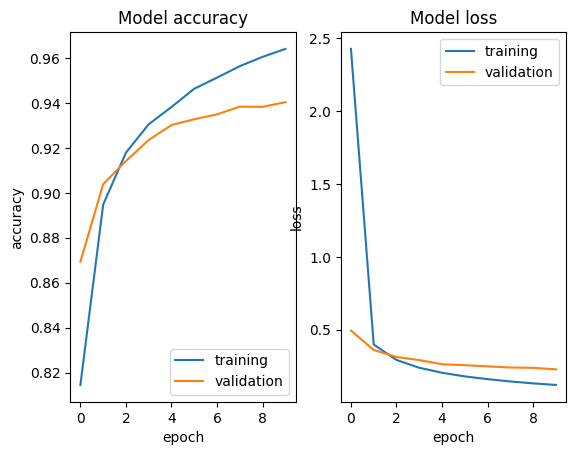

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [20]:
model_mnist.evaluate(x_test_1, y_test_1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2255 - accuracy: 0.9414


[0.22549009323120117, 0.9413999915122986]

#### Predicting Some samples from Test set

In [21]:
sample_predictions = model_mnist.predict(x_test_1[:3])

# Convert one-hot encoded predictions to integer labels
sample_predictions_int = np.argmax(sample_predictions, axis=1)

print("Predictions for the first three test samples:")
for i, prediction in enumerate(sample_predictions_int):
    print(f"Sample {i+1}: Predicted Label: {prediction}, Actual Label: {np.argmax(y_test_1, axis=1)[i]}")

1/1 [==============================] - 0s 73ms/step
Predictions for the first three test samples:
Sample 1: Predicted Label: 7, Actual Label: 7
Sample 2: Predicted Label: 2, Actual Label: 2
Sample 3: Predicted Label: 1, Actual Label: 1
